In [49]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

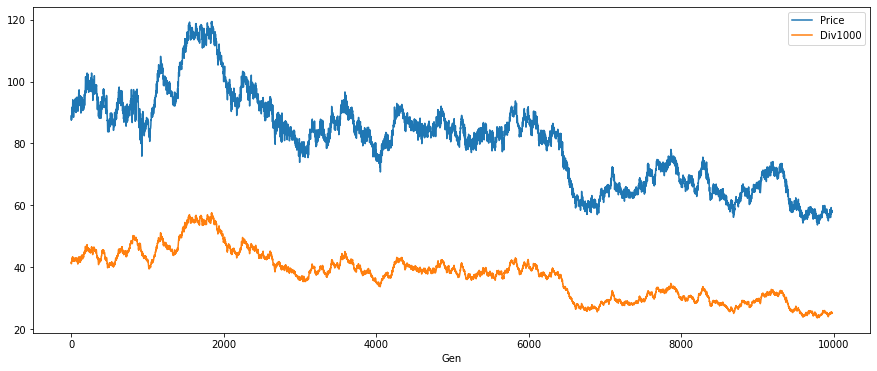

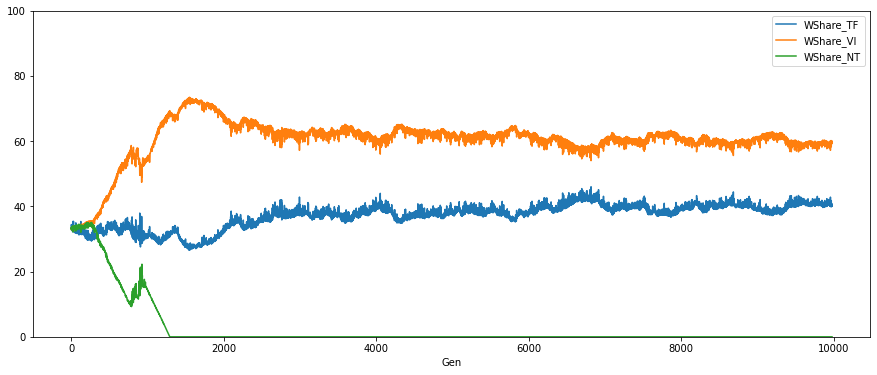

In [50]:
# df.plot(x="Gen", y = ["Price"],
#         kind="line", figsize=(15, 6))
# plt.show()

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
-0.9132176124659224 -0.5195660104949581 0.20486905012891415
Annual mean returns  
[-0.2823071204071498, -0.09272875793038174, 0.010735197452059015]
Annual std returns
[0.30913455517447586, 0.17847348759793744, 0.052400289088585496]
T test for Rf = 0, VI vs TF
T test value VI-TF is -37.05589627004666
T test value VI-NT is 31.646273576803218
T test value TF-NT is 57.96635348593121
confidence intervals at 95%
[-0.9365734212633948, -0.8898618036684499]
[-0.5404688649561816, -0.4986631560337345]
[0.18504363079277783, 0.22469446946505048]
Including r = 0.01 as risk free rate
[-77.47565225097365, -49.655867933998934, 19.265334658344077]


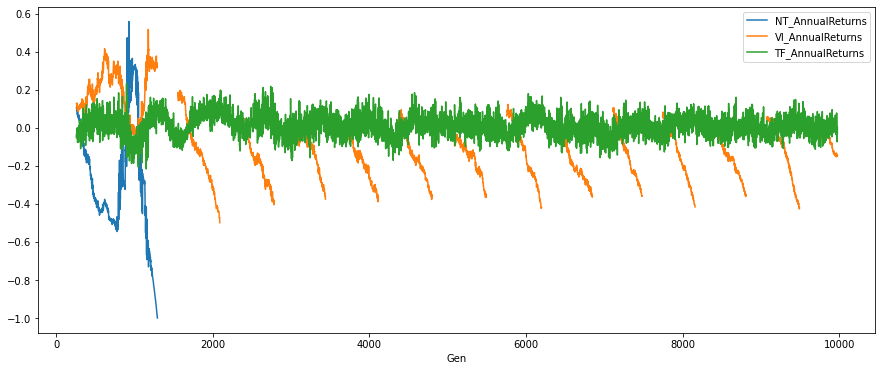

In [51]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

print('T test for Rf = 0, VI vs TF')
df['DiffAR_VI_TF'] = df['VI_AnnualReturns'] - df['TF_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['TF_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_TF'])
obs = len(df['DiffAR_VI_TF'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-TF is ' + str(t))

df['DiffAR_VI_NT'] = df['VI_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_NT'])
obs = len(df['DiffAR_VI_NT'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-NT is ' + str(t))

df['DiffAR_TF_NT'] = df['TF_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['TF_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_TF_NT'])
obs = len(df['DiffAR_TF_NT'])
t = (srNT -srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value TF-NT is ' + str(t))


print('confidence intervals at 95%')
T = len(df['VI_AnnualReturns'])

CI_Sharpe_NT = [SharpeNT - 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T),SharpeNT + 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T)]
print(CI_Sharpe_NT)
CI_Sharpe_VI = [SharpeVI - 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T),SharpeVI + 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T)]
print(CI_Sharpe_VI)
CI_Sharpe_TF = [SharpeTF - 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T),SharpeTF + 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T)]
print(CI_Sharpe_TF)

print('Including r = 0.01 as risk free rate')

TValueNT = (SharpeNT - 0.01) / np.sqrt((1 + 0.5 * SharpeNT**2)/T)
TValueVI = (SharpeVI - 0.01) / np.sqrt((1 + 0.5 * SharpeVI**2)/T)
TValueTF = (SharpeTF - 0.01) / np.sqrt((1 + 0.5 * SharpeTF**2)/T)
print([TValueNT,TValueVI,TValueTF])


df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()

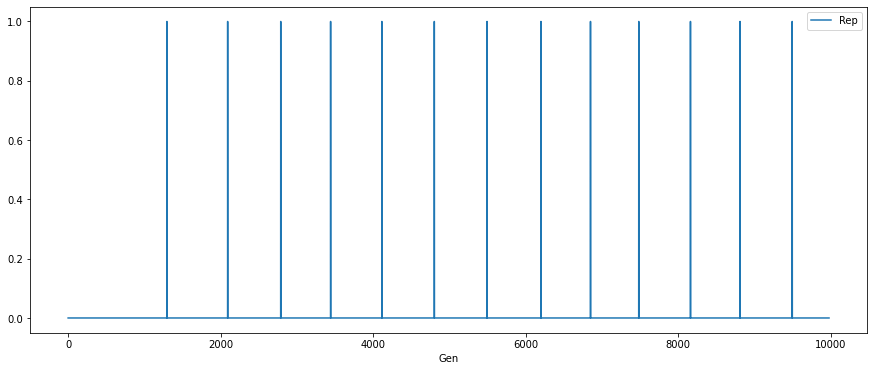

In [52]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

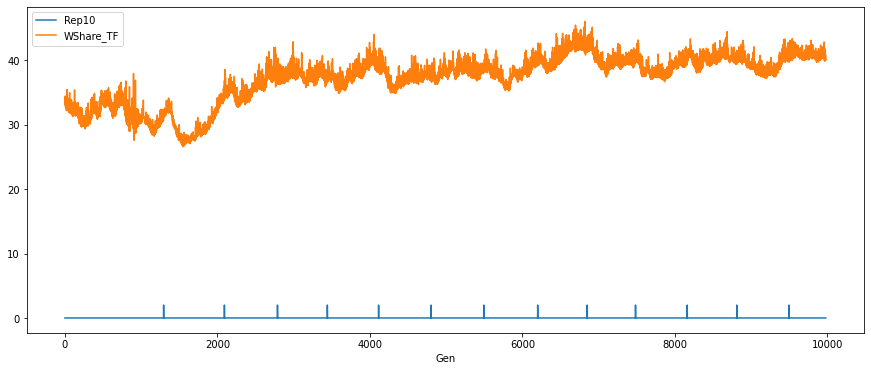

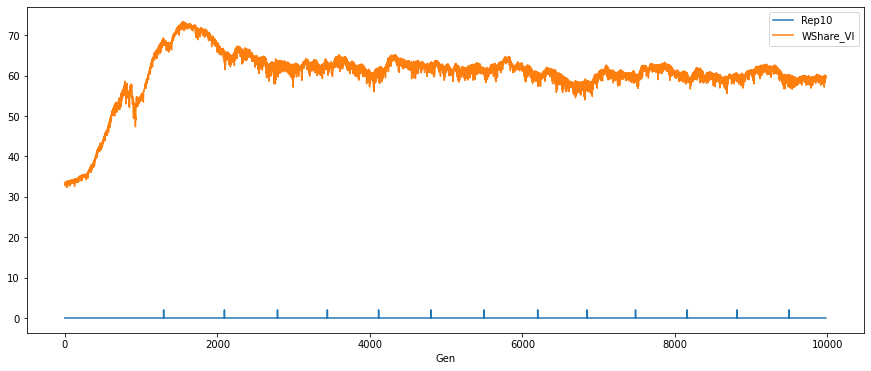

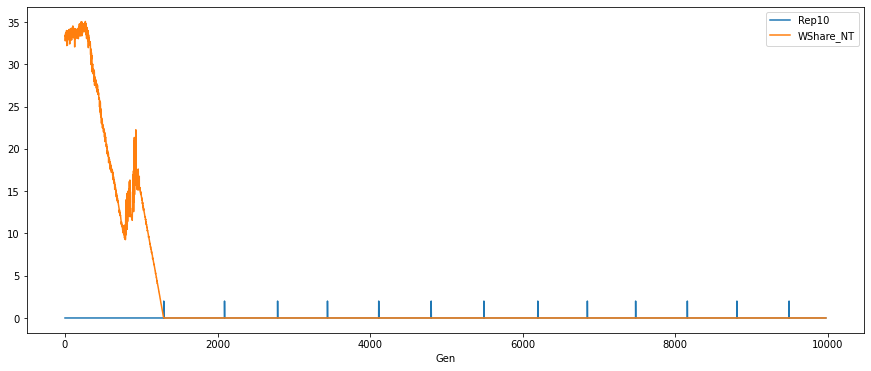

In [53]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [54]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

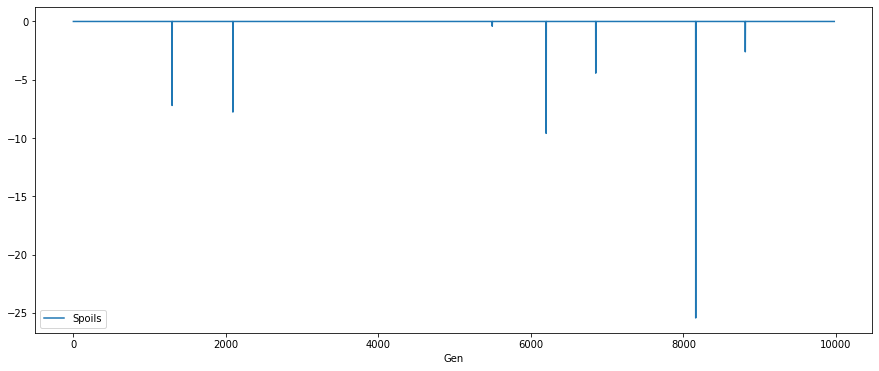

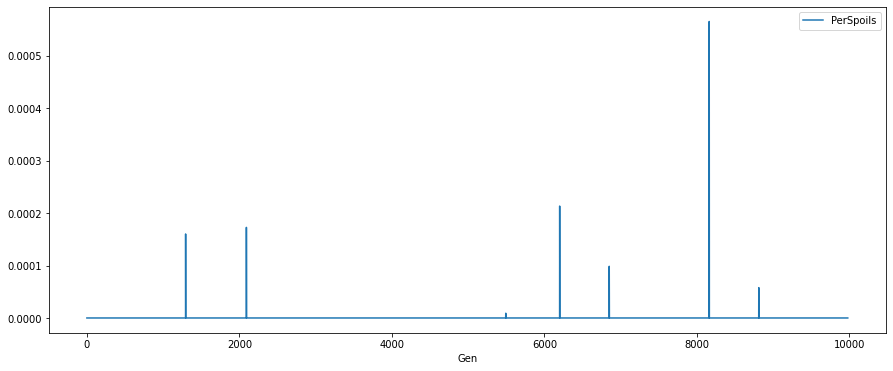

In [55]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

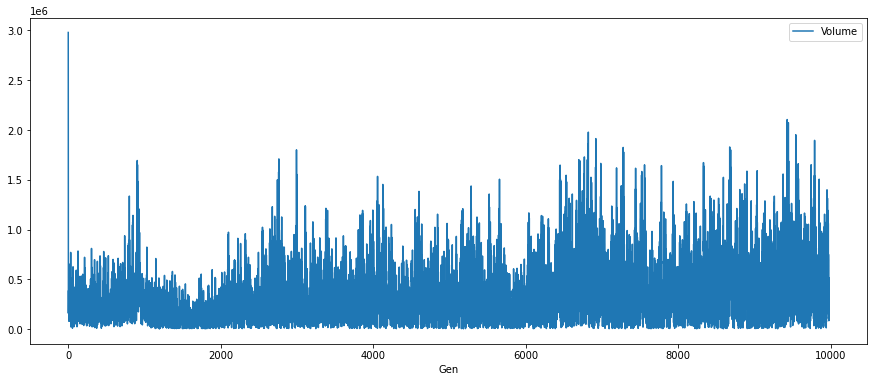

0       2.979843e+06
1       5.466888e+05
2       1.597323e+05
3       3.465421e+05
4       3.883160e+05
            ...     
9974    8.495467e+04
9975    4.571372e+05
9976    9.709207e+04
9977    5.158721e+05
9978    1.681186e+05
Name: Volume, Length: 9979, dtype: float64


In [56]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

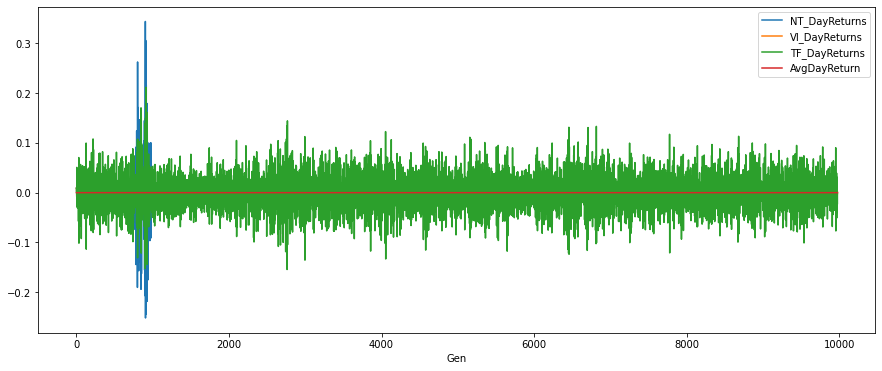

In [57]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

-0.20045348943478924
96.32834681169517


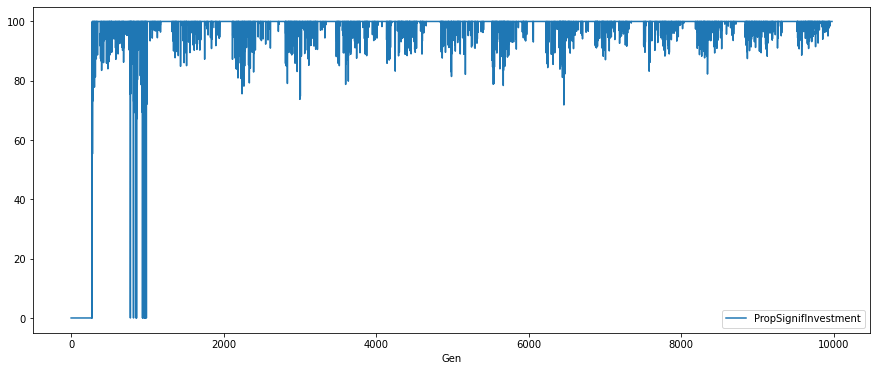

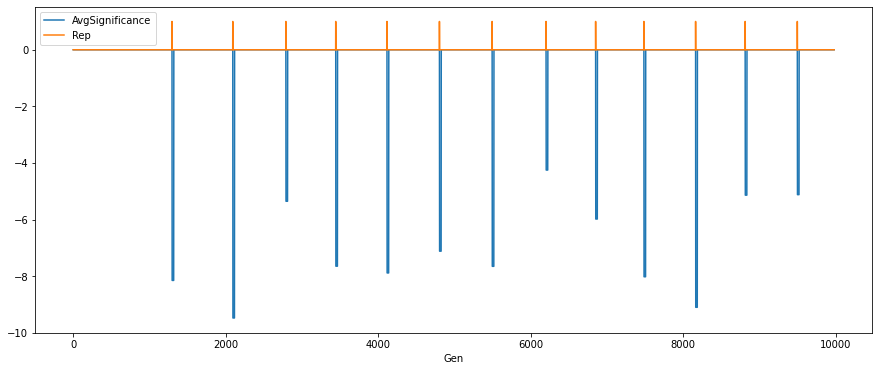

In [58]:
print(df['AvgSignificance'].mean())
print(df['PropSignifInvestment'].mean())
df.plot(x="Gen", y = ["PropSignifInvestment"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["AvgSignificance", "Rep"],
        kind="line", figsize=(15, 6))
plt.show()

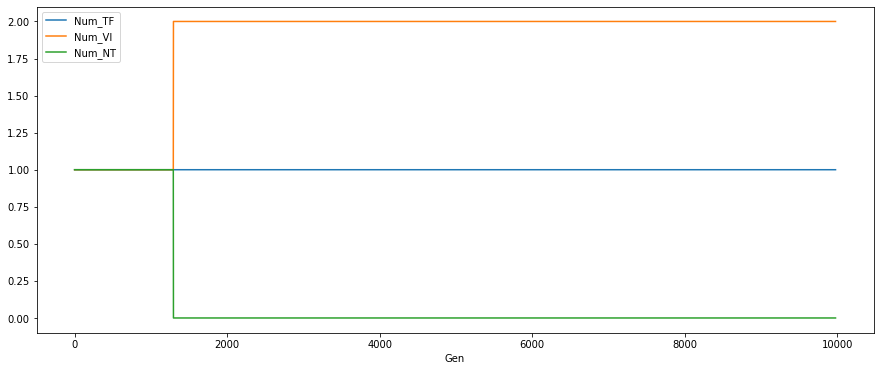

In [59]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


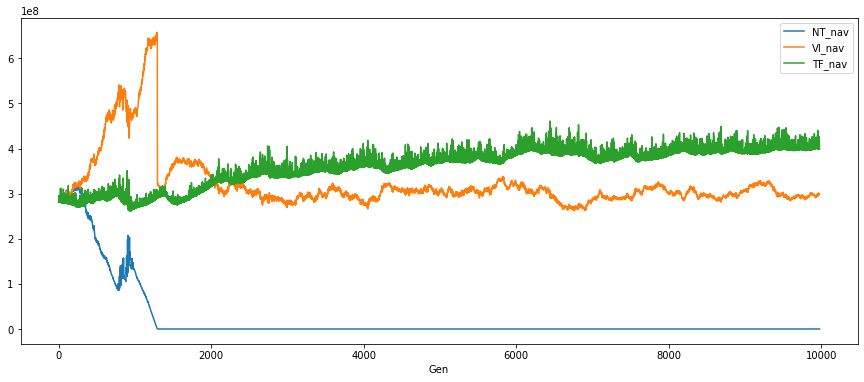

In [60]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


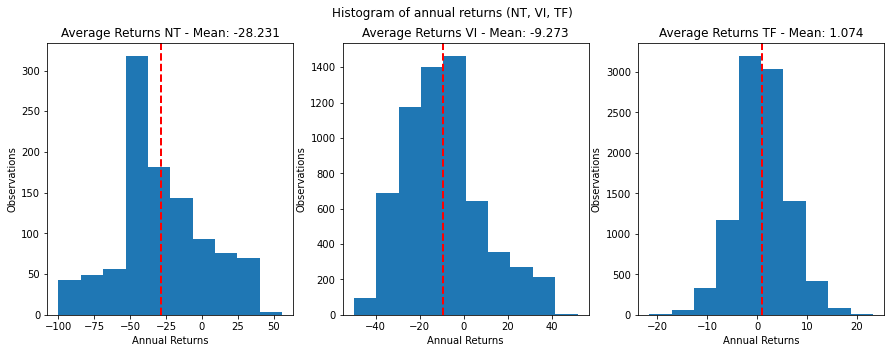

In [61]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [62]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.5191080351755595


In [63]:
''' Significance test '''

data = pd.DataFrame()
data['NT'] = df['NT_AnnualReturns'].iloc[-252*2:]
data['VI'] = df['VI_AnnualReturns'].iloc[-252*2:]
data['TF'] = df['TF_AnnualReturns'].iloc[-252*2:]

def Sharpe(arr):
    sharpe = np.nanmean(arr) / np.nanstd(arr)
    se = np.sqrt((1 + 0.5 * sharpe ** 2)/len(arr))
    result = [sharpe, se]
    return result

print('Full data Sharpe ')
print([Sharpe(df['NT_AnnualReturns']),Sharpe(df['VI_AnnualReturns']),Sharpe(df['TF_AnnualReturns'])])

print('Last 2Y Sharpe')
print(len(data['NT']))
print([Sharpe(data['NT']),Sharpe(data['VI']),Sharpe(data['TF'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-20:]

print('Last 20 days Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-252*20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-252*20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-252*20:]

print('Last 20Y Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])



Full data Sharpe 
[[-0.9132176124659224, 0.011916228978302279], [-0.5195660104949581, 0.010664721663889576], [0.20486905012891415, 0.01011500986537567]]
Last 2Y Sharpe
504
[[nan, nan], [-1.0196881010742262, 0.05491483145528413], [0.06845395888529965, 0.0445956919284637]]
Last 20 days Sharpe
20
[[nan, nan], [-27.596921110848413, 4.3691820023844015], [0.01558996797840136, 0.22362038408324764]]
Last 20Y Sharpe
5040
[[nan, nan], [-1.204619603330935, 0.018503293327438445], [0.11783536102504485, 0.014134715973993482]]


/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_24765/4048983765.py:9: RuntimeWarning: Mean of empty slice
  sharpe = np.nanmean(arr) / np.nanstd(arr)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [64]:
popsize = 5
import numpy as np
from scipy.special import stdtrit

generation = 100
returns_tracker = np.random.rand(generation,popsize)
# print(returns_tracker)

ReinvestmentRate = 1.2
returns_tracker[:,1] = -1 * returns_tracker[:,1]
# print(returns_tracker)
InvestmentHorizon = 5


def Investment(returns_tracker, InvestmentHorizon, generation):
    ReturnData = returns_tracker[generation-InvestmentHorizon:generation,:]
    InvestmentRatios = [np.nan] * popsize
    # print(ReturnData)
    # It correctly takes the last 5 points
    SharpeList = [0] * popsize

    TestThreshold = stdtrit(InvestmentHorizon, 0.95)
    TestValues1 = [0] * popsize

    for i in range(popsize):
        DataSlice = ReturnData[:,i]
        MeanReturns = np.nanmean(DataSlice)
        StdReturns = np.nanstd(DataSlice)
        if StdReturns != 0:
            Sharpe = MeanReturns / StdReturns
        else:
            Sharpe = np.nan

        SESharpe = np.sqrt(1 + 0.5 * Sharpe ** 2) / np.sqrt(InvestmentHorizon)
        SharpeList[i] = Sharpe
        DailyInterestRate = 0.01 / 252
        TValue = (Sharpe - DailyInterestRate) / SESharpe
        TestValues1[i] = TValue

        # Replacement by a continuous mechanism
    SumTValues = sum(TestValues1)
    countSignif = 0
    for i in range(popsize):
        InvestmentRatios[i] = TestValues1[i] / SumTValues
        if TestValues1[i] > TestThreshold:
            countSignif += 1

    return countSignif, InvestmentRatios

countSignif, InvestmentRatios = Investment(returns_tracker, 3, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 5, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 50, generation)
print([countSignif, InvestmentRatios])

[1, [0.4423604956286937, -0.4176288290231033, 0.3605324504747148, 0.29412692782007094, 0.3206089550996239]]
[3, [0.4215182923636777, -0.5021667026800006, 0.22570628096740913, 0.42357994202807125, 0.4313621873208424]]
[4, [0.3516195671405211, -0.33341088935524704, 0.33317619247869185, 0.2922440536480287, 0.3563710760880054]]
